In [1]:
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

script_dir = '/Users/tanshi/Desktop/SIP/'
fits_dir = '/Users/tanshi/Desktop/SIP/fitsfiles/'
data_dir ='/Users/tanshi/Desktop/SIP/'
execfile(script_dir+'plot_routines.py')

In [2]:
e5a = fits.open(fits_dir + 'zspec.E5a.fits')
e6a = fits.open(fits_dir + 'zspec.E6a.fits')
e7a = fits.open(fits_dir + 'zspec.E7a.fits')

In [3]:
hdulist = e5a
hdulist2 = e6a
hdulist3 = e7a
hdulist.info()

Filename: /Users/tanshi/Desktop/SIP/fitsfiles/zspec.E5a.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     91   20R x 35C   [4A, 17A, 12A, 2A, 3A, 10A, D, E, E, E, J, E, 21A, 10J, 35E, 35E, 595A, J, 10E, E, E, I, 51A, 11A, 11A, I, E, E, 40A, 41A, 26A, A, E, E, E]   


In [4]:
egs = Table.read(data_dir+'egs.hdf5')

/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [5]:
from astropy import units as u
from astropy.coordinates import SkyCoord

# returns RA coordinate given an input in hh:mm:ss
def ra_coordinate(ra_input,dec_input):
	point = SkyCoord(ra_input,dec_input,frame='icrs',unit=(u.hourangle,u.deg))
	return point.ra.hour * 15

# returns DEC coordinate given an input of degrees:minutes:seconds
def dec_coordinate(ra_input,dec_input):
	point = SkyCoord(ra_input,dec_input,frame='icrs',unit=(u.hourangle,u.deg))
	return point.dec.degree

# finds a match less than 0.1/3600
def match(full_list_ra,full_list_dec,ra_match,dec_match):
	ra_match = ra_coordinate(ra_match,dec_match)
	dec_match = dec_coordinate(ra_match,dec_match)
	# print ra_match
	# print dec_match
	for i in range(len(full_list_ra)):
		ra_coord = full_list_ra[i]
		dec_coord = full_list_dec[i]
		dist = distance(ra_coord,dec_coord,ra_match,dec_match)
		if (dist < (0.1/3600.)):
			print i, dist
            

# distance formula
def distance(x1,y1,x2,y2):
	return np.sqrt((x1-x2)**2+(y1-y2)**2)

def id_match(full_list_ra,full_list_dec,ra_match,dec_match):
	ra_match = ra_coordinate(ra_match,dec_match)
	dec_match = dec_coordinate(ra_match,dec_match)
	# print ra_match
	# print dec_match
	for i in range(len(full_list_ra)):
		ra_coord = full_list_ra[i]
		dec_coord = full_list_dec[i]
		dist = distance(ra_coord,dec_coord,ra_match,dec_match)
		if (dist < (.1/3600.)):
			print i

In [6]:
# making cuts
egs_selection = np.where ( \
                          (egs['PhotFlag']==0) &\
#                           (egs['CLASS_STAR']>0.9) & \
                          (egs['ACS_F606W_flux'] > 0) &\
                         (egs['ACS_F814W_flux'] > 0) &\
                          (egs['WFC3_F125W_flux'] > 0) &\
                         (egs['WFC3_F160W_flux'] > 0))

# last 3 conditions ensure log10() exists
egs_temp = egs[egs_selection]

# brightness cut pt 4
egs_selection2 = np.where ( \
                          -2.5*np.log10(egs_temp['ACS_F814W_flux']) < 1.209293)
# # brightness cut pt 3
# egs_selection2 = np.where ( \
#                           (-2.5*np.log10(egs_temp['ACS_F814W_flux']) <= 2.324637) &\
#                         (-2.5*np.log10(egs_temp['ACS_F814W_flux']) > 1.209293))
# # brightness cut pt 2
# egs_selection2 = np.where ( \
#                           (-2.5*np.log10(egs_temp['ACS_F814W_flux']) <= 3.233952) &\
#                         (-2.5*np.log10(egs_temp['ACS_F814W_flux']) > 2.324637))
# # brightness cut pt 1
# egs_selection2 = np.where ( \
#                           -2.5*np.log10(egs_temp['ACS_F814W_flux']) > 3.233952)
egs_full = egs_temp[egs_selection2]

# median cut
egs_selection3 = np.where ( \
                          (-2.5*np.log10(egs_temp['WFC3_F125W_flux']) <= 1.209293) &\
                          (egs_temp['CLASS_STAR'] > 0.9))
egs_cut = egs_temp[egs_selection3]
egs_full = egs_temp

# length of array
total_length_cut = len(egs_cut)
total_length_full = len(egs_full)
print total_length_cut
print total_length_full

308
34263


In [7]:
## define variables for GOODS-S
# conversion from flux to mag
f606_egs_flux_full = egs_full['ACS_F606W_flux'] ## rest-frame .606 μm magnitude
f814_egs_flux_full = egs_full['ACS_F814W_flux']  ## rest-frame .814 μm magnitude
f125_egs_flux_full = egs_full['WFC3_F125W_flux']   ## rest-frame 1.25 μm magnitude
f160_egs_flux_full = egs_full['WFC3_F160W_flux']   ## rest-frame 1.60 μm magnitude

f606_egs_mag_full = -2.5*np.log10(f606_egs_flux_full)
f814_egs_mag_full = -2.5*np.log10(f814_egs_flux_full)
f125_egs_mag_full = -2.5*np.log10(f125_egs_flux_full)
f160_egs_mag_full = -2.5*np.log10(f160_egs_flux_full)

f606_f814_egs_full = f606_egs_mag_full - f814_egs_mag_full
f814_f125_egs_full = f814_egs_mag_full - f125_egs_mag_full
f125_f160_egs_full = f125_egs_mag_full - f160_egs_mag_full

# mstar_egs = egs_full['M_med'] # already logged?
# z_egs = egs_full['z_best']  ## redshift

In [8]:
f606_egs_flux_cut = egs_cut['ACS_F606W_flux'] ## rest-frame .606 μm magnitude
f814_egs_flux_cut = egs_cut['ACS_F814W_flux']  ## rest-frame .814 μm magnitude
f125_egs_flux_cut = egs_cut['WFC3_F125W_flux']   ## rest-frame 1.25 μm magnitude
f160_egs_flux_cut = egs_cut['WFC3_F160W_flux']   ## rest-frame 1.60 μm magnitude

f606_egs_mag_cut = -2.5*np.log10(f606_egs_flux_cut)
f814_egs_mag_cut = -2.5*np.log10(f814_egs_flux_cut)
f125_egs_mag_cut = -2.5*np.log10(f125_egs_flux_cut)
f160_egs_mag_cut = -2.5*np.log10(f160_egs_flux_cut)

f606_f814_egs_cut = f606_egs_mag_cut - f814_egs_mag_cut
f814_f125_egs_cut = f814_egs_mag_cut - f125_egs_mag_cut
f125_f160_egs_cut = f125_egs_mag_cut - f160_egs_mag_cut

In [9]:
# f606_814_egs is the original y-values and f814_f125 is the original x-values
# returns the new array f814_f125 based on sort of f606_f184 (explanation: https://stackoverflow.com/questions/6618515/sorting-list-based-on-values-from-another-list)
f814_f125_egs_cut_sorted1 = [x for _,x in sorted(zip(f606_f814_egs_cut,f814_f125_egs_cut))]
# sorts f606_f814
f606_f814_egs_cut_sorted1 = np.sort(f606_f814_egs_cut)
# define the moving median arrays
movingmedian_f606_f814_egs1 = np.array([])
movingmedian_f814_f125_egs1 = np.array([])
# scanning through all elements up to the 15th to the last
for i in range (0,total_length_cut-15):
    data2 = np.array([])
    # creating an array of the 15 elements
    for j in range(i,i+15):
        data2 = np.append(data2,f606_f814_egs_cut_sorted1[j])
    # adding the median of the 15 elements to the moving median array
    movingmedian_f606_f814_egs1 = np.append(movingmedian_f606_f814_egs1,np.median(data2))
# repeating for the x-values
for k in range (0,total_length_cut-15):
    data3 = np.array([])
    for l in range(k,k+15):
        data3 = np.append(data3,f814_f125_egs_cut_sorted1[l])
    movingmedian_f814_f125_egs1 = np.append(movingmedian_f814_f125_egs1,np.median(data3))
# print movingmedian_f606_f814_egs1

In [10]:
# f814_125_egs is the original y-values and f125_f160 is the original x-values
# returns the new array f125_f160 based on sort of f814_f184 (explanation: https://stackoverflow.com/questions/6618515/sorting-list-based-on-values-from-another-list)
f125_f160_egs_cut_sorted2 = [x for _,x in sorted(zip(f814_f125_egs_cut,f125_f160_egs_cut))]
# sorts f814_f125
f814_f125_egs_cut_sorted2 = np.sort(f814_f125_egs_cut)
# define the moving median arrays
movingmedian_f814_f125_egs2 = np.array([])
movingmedian_f125_f160_egs2 = np.array([])
# scanning through all elements up to the 15th to the last
for i in range (0,total_length_cut-15):
    data2 = np.array([])
    # creating an array of the 15 elements
    for j in range(i,i+15):
        data2 = np.append(data2,f814_f125_egs_cut_sorted2[j])
    # adding the median of the 15 elements to the moving median array
    movingmedian_f814_f125_egs2 = np.append(movingmedian_f814_f125_egs2,np.median(data2))
# repeating for the x-values
for k in range (0,total_length_cut-15):
    data3 = np.array([])
    for l in range(k,k+15):
        data3 = np.append(data3,f125_f160_egs_cut_sorted2[l])
    movingmedian_f125_f160_egs2 = np.append(movingmedian_f125_f160_egs2,np.median(data3))
# print movingmedian_f814_f125_egs2

In [11]:
stars_list = np.array([])
# for i in range(0,len(egs_full)):
#     if (egs_full['ID'][i] == 11331 or \
#         egs_full['ID'][i] == 12601 or \
#         egs_full['ID'][i] == 2375 or \
#         egs_full['ID'][i] == 7206 or \
#         egs_full['ID'][i] == 10635 or \
#         egs_full['ID'][i] == 15397 or \
#         egs_full['ID'][i] == 6955 or \
#         egs_full['ID'][i] == 6184 or \
#         egs_full['ID'][i] == 31193 or \
#         egs_full['ID'][i] == 28680 or \
#         egs_full['ID'][i] == 24117 or \
#         egs_full['ID'][i] == 11940 or \
#         egs_full['ID'][i] == 3845 or \
#         egs_full['ID'][i] == 7398 or \
#         egs_full['ID'][i] == 9359 or \
#         egs_full['ID'][i] == 418 or \
#         egs_full['ID'][i] == 676 or \
#         egs_full['ID'][i] == 24479 or \
#         egs_full['ID'][i] == 24685 or \
#         egs_full['ID'][i] == 460 or \
#         egs_full['ID'][i] == 13544 or \
#         egs_full['ID'][i] == 13824 or \
#         egs_full['ID'][i] == 14355 or \
#         egs_full['ID'][i] == 20520 or \
#         egs_full['ID'][i] == 28656 or \
#         egs_full['ID'][i] == 13220 or \
#         egs_full['ID'][i] == 14920 or \
#         egs_full['ID'][i] == 29109 or \
#         egs_full['ID'][i] == 2994 or \
#        egs_full['ID'][i] == 8899):
#         stars_list = np.append(stars_list,int(i))
# galaxy_list = np.array([])
# for i in range(0,len(egs_full)):
#     if (egs_full['ID'][i] == 4117 or \
#         egs_full['ID'][i] == 4864 or \
#         egs_full['ID'][i] == 20111):
#         galaxy_list = np.append(galaxy_list,int(i))
galaxy_list = np.array([])

In [12]:
data = Table(hdulist[1].data)

# new_ra = [len(Table(hdulist[1].data))+len(Table(hdulist2[1].data))+len(Table(hdulist3[1].data))]
# new_dec = [len(new_ra)]
# crossmatched = []

# for i in range (0,len(Table(hdulist[1].data))):
#     new_ra[i] = ra_coordinate(Table(hdulist[1].data)['RA'][i], Table(hdulist[1].data)['DEC'][i])
#     new_dec[i] = dec_coordinate(Table(hdulist[1].data)['RA'][i], Table(hdulist[1].data)['DEC'][i])
# for j in range (len(Table(hdulist[1].data))+1,len(Table(hdulist2[1].data))):
#     new_ra[j] = ra_coordinate(Table(hdulist2[1].data)['RA'][j], Table(hdulist[1].data)['DEC'][j])
#     new_dec[j] = dec_coordinate(Table(hdulist2[1].data)['RA'][j], Table(hdulist[1].data)['DEC'][j])
# for k in range (len(Table(hdulist2[1].data))+1,len(Table(hdulist3[1].data))):
#     new_ra[k] = ra_coordinate(Table(hdulist3[1].data)['RA'][k], Table(hdulist[1].data)['DEC'][k])
#     new_dec[k] = dec_coordinate(Table(hdulist3[1].data)['RA'][k], Table(hdulist[1].data)['DEC'][k])
    
# for i in range(0, len(new_ra)):
#     if (((egs['RAdeg'][i]) - new_ra[i]) < 0.1) or (((egs['RAdeg'][i]) - new_ra[i]) == 0.1):
#         crossmatched[i] = egs['ID'][i]
#     else:
#         print(i)        
        

# egs_selection = np.where ( \
#                           (egs['PhotFlag']==0) &\
#                           #(egs['CLASS_STAR']>0.9) & \
#                          (egs['ACS_F606W_flux'] > 0) &\
#                           (egs['ACS_F814W_flux'] > 0) &\
#                          (egs['WFC3_F125W_flux'] > 0))
# egs_final = egs[egs_selection]
# egs_selection2 = np.where ( \
#                           -2.5*np.log10(egs_temp['ACS_F814W_flux']) > 3.484530)


flux = egs_full['ACS_F814W_flux']
mag = -2.5*np.log10(flux)
print(len(mag))
print(len(egs_full['RAdeg']))

id_list = np.array([])


for i in range(0, len(Table(hdulist[1].data))):
    print match(egs_full['RAdeg'], egs_full['DECdeg'], Table(hdulist[1].data)['RA'][i], Table(hdulist[1].data)['DEC'][i])
#   print id_match(egs_final['RAdeg'], egs_final['DECdeg'], Table(hdulist[1].data)['RA'][i], Table(hdulist[1].data)['DEC'][i])
#     print (mag[id])
#     id_list = np.append (id_list, id)
#     print('id:' , id)
    
for j in range(0, len(Table(hdulist2[1].data))):
    match(egs_full['RAdeg'], egs_full['DECdeg'], Table(hdulist2[1].data)['RA'][j], Table(hdulist2[1].data)['DEC'][j])
    #id = id_match(egs_final['RAdeg'], egs_final['DECdeg'], Table(hdulist2[1].data)['RA'][i], Table(hdulist2[1].data)['DEC'][i])
    #print(mag[id])
    #id_list = np.append (id_list, id)
    
for k in range(0, len(Table(hdulist3[1].data))):
    match(egs_full['RAdeg'], egs_full['DECdeg'], Table(hdulist3[1].data)['RA'][k], Table(hdulist3[1].data)['DEC'][k])
#id = id_match(egs_final['RAdeg'], egs_final['DECdeg'], Table(hdulist3[1].data)['RA'][i], Table(hdulist3[1].data)['DEC'][i])
#     print(mag[id])
#     id_list = np.append (id_list, id)
    
egs1 = np.loadtxt('E5a_notes.txt',usecols=(1,2),unpack=True)
egs2 = np.loadtxt('E6a_notes.txt',usecols=(1,2),unpack=True)
egs3 = np.loadtxt('E7a_notes.txt',usecols=(1,2),unpack=True)

# print (egs1[0])
# print (egs2[0])
# print (egs3[0])

stars_list = np.append(stars_list, 9173)
stars_list = np.append(stars_list, 5846)
stars_list = np.append(stars_list, 8346)
stars_list = np.append(stars_list, 8629)
stars_list = np.append(stars_list, 12468)
stars_list = np.append(stars_list, 5635)
stars_list = np.append(stars_list, 4973)
stars_list = np.append(stars_list, 25119)
stars_list = np.append(stars_list, 23146)
#print(stars_list)




34263
34263
9173 1.9716265140847282e-05
None
None
None
5846 1.3819832769199339e-05
None
8346 1.836860239996461e-05
None
8629 2.0943065106997182e-05
None
12468 5.835883046024962e-06
None
None
5635 2.690747746175236e-06
None
4973 6.003712888415636e-06
None
25116 2.334472208978297e-05
None
None
None
None
None
None
None
None
23143 1.7544655587065442e-05
None
None
9661 1.9755449327058087e-05
3044 2.251024455296488e-05
3883 5.844000818366318e-06
5253 7.107820395542249e-06
7615 1.970924765716063e-05
295 2.3853488000920733e-05
485 1.9515122346559386e-05
19940 1.3568704927932117e-05
326 1.7585435172410058e-05
3825 1.1501245202829833e-05
10949 2.522309591004937e-05
11621 5.7224811448942974e-06
14119 6.501547799728862e-06
16311 8.080841536990888e-06
16631 1.7197545063491325e-05
23127 1.9875305734152264e-05
10683 3.38341995620888e-06
12079 1.4303836997965693e-05
7237 5.847126614186291e-06


(-1, 5)

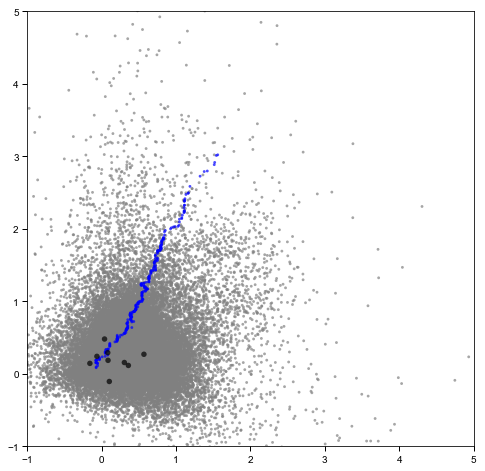

In [13]:
fig=plt.figure(figsize=(8,8))
plt.scatter(f814_f125_egs_full,f606_f814_egs_full,c='grey',edgecolors='none',s=8,alpha=0.7)
plt.scatter(movingmedian_f814_f125_egs1,movingmedian_f606_f814_egs1,c='blue',edgecolors='none',s=8,alpha=0.7)
for i in stars_list:
    plt.scatter(f814_f125_egs_full[int(i)],f606_f814_egs_full[int(i)],c='black',edgecolors='none',s=30,alpha=0.7)
for i in galaxy_list:
    plt.scatter(f814_f125_egs_full[int(i)],f606_f814_egs_full[int(i)],c='red',edgecolors='none',s=30,alpha=0.7)
plt.xlim(-1,5)
plt.ylim(-1,5)
# plt.savefig(out_dir+'GIJ_pt4_egs_starlike_movingmedian.pdf')

Text(0,0.5,'I (.814micron) - J (1.25micron)')

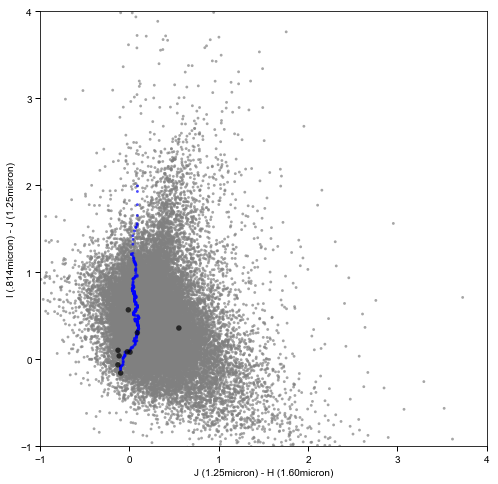

In [14]:
fig=plt.figure(figsize=(8,8))
plt.scatter(f125_f160_egs_full,f814_f125_egs_full,c='gray',edgecolors='none',s=8,alpha=0.7)
plt.scatter(movingmedian_f125_f160_egs2,movingmedian_f814_f125_egs2,c='blue',edgecolors='none',s=8,alpha=0.7)
for i in stars_list:
    plt.scatter(f125_f160_egs_full[int(i)],f814_f125_egs_full[int(i)],c='black',edgecolors='none',s=30,alpha=0.7)
for i in galaxy_list:
    plt.scatter(f125_f160_egs_full[int(i)],f814_f125_egs_full[int(i)],c='red',edgecolors='none',s=30,alpha=0.7)
plt.xlim(-1,4)
plt.ylim(-1,4)
plt.xlabel('J (1.25micron) - H (1.60micron)')
plt.ylabel('I (.814micron) - J (1.25micron)')
# plt.savefig(out_dir+'IJH_pt4_egs_starlike_movingmedian.pdf')

(array([1.0699e+04, 6.4640e+03, 5.4300e+03, 4.5680e+03, 3.0010e+03,
        1.6660e+03, 9.0200e+02, 5.2900e+02, 3.1400e+02, 1.9500e+02,
        1.3000e+02, 7.9000e+01, 6.4000e+01, 3.6000e+01, 3.1000e+01,
        2.7000e+01, 2.1000e+01, 1.8000e+01, 8.0000e+00, 1.1000e+01,
        1.1000e+01, 9.0000e+00, 9.0000e+00, 7.0000e+00, 6.0000e+00,
        4.0000e+00, 3.0000e+00, 0.0000e+00, 3.0000e+00, 2.0000e+00,
        2.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        4.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([0.        , 0.16192814, 0.32385628, 0.48578442, 0.64771255,
        0.80964069, 0.97156883, 1.13349697, 1.29542511, 1.45735325,
        1.61928139, 1.78120953, 1.94313766, 2.1050658 , 2.26699394,
        2.42892208, 2.59085022, 2.75277836, 2.9147065 , 3.07663464,
        3.23856277, 3.40049091, 3.56241905, 3.

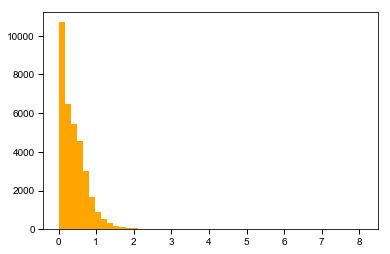

In [15]:
# array of all the points' distances from the moving median line
distance_606_814_125_egs = np.array([])
# looks through every point to find each one's distance from the median line
for m in range(0,total_length_full):
    # arbitrary large value for the initialization of min_distance
    min_distance = 99999
    # loop through all moving median points to find the shortest distance from that specific point to the moving median
    for n in range(0,total_length_cut-15):
        # distance formula: sqrt((x2-x1)^2+(y2-y1)^2)
        dist = np.sqrt((movingmedian_f606_f814_egs1[n]-f606_f814_egs_full[m])**2+(movingmedian_f814_f125_egs1[n]-f814_f125_egs_full[m])**2)
        # condition to replace min_distance
        if (dist < min_distance):
            min_distance = dist
    distance_606_814_125_egs = np.append(distance_606_814_125_egs,min_distance)
# print distance_606_814_125_egs
plt.hist(distance_606_814_125_egs,50,color='orange')
# plt.savefig(out_dir+'distance_606_814_125_egs.pdf')

In [16]:
# stars_histogram1 = np.array([])
# galaxy_histogram1 = np.array([])
# for i in stars_list:
#     stars_histogram1 = np.append(stars_histogram1,distance_606_814_125_egs[int(i)])
# for i in galaxy_list:
#     galaxy_histogram1 = np.append(galaxy_histogram1,distance_606_814_125_egs[int(i)])
# # plt.hist(distance_814_125_160_egs,50,color='orange')
# np.set_printoptions(threshold='nan')
# print stars_histogram1
# print galaxy_histogram1
# plt.hist(stars_histogram1,color='blue',histtype='step',normed=True)
# plt.hist(galaxy_histogram1,color='red',histtype='step',normed=True)
# plt.xlabel('distance')

(array([1.3899e+04, 7.6940e+03, 4.8610e+03, 2.9540e+03, 1.7230e+03,
        1.0000e+03, 6.9100e+02, 3.8900e+02, 2.8800e+02, 1.8600e+02,
        1.4400e+02, 8.7000e+01, 5.8000e+01, 5.3000e+01, 4.3000e+01,
        2.3000e+01, 3.3000e+01, 2.1000e+01, 1.4000e+01, 1.7000e+01,
        1.3000e+01, 4.0000e+00, 9.0000e+00, 7.0000e+00, 5.0000e+00,
        4.0000e+00, 7.0000e+00, 7.0000e+00, 4.0000e+00, 2.0000e+00,
        1.0000e+00, 1.0000e+00, 4.0000e+00, 1.0000e+00, 3.0000e+00,
        3.0000e+00, 1.0000e+00, 1.0000e+00, 3.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([0.        , 0.14857456, 0.29714912, 0.44572367, 0.59429823,
        0.74287279, 0.89144735, 1.04002191, 1.18859646, 1.33717102,
        1.48574558, 1.63432014, 1.7828947 , 1.93146925, 2.08004381,
        2.22861837, 2.37719293, 2.52576748, 2.67434204, 2.8229166 ,
        2.97149116, 3.12006572, 3.26864027, 3.

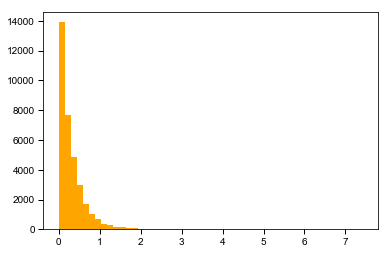

In [17]:
# array of all the points' distances from the moving median line
distance_814_125_160_egs = np.array([])
# looks through every point to find each one's distance from the median line
for m in range(0,total_length_full):
    # arbitrary large value for the initialization of min_distance
    min_distance = 99999
    # loop through all moving median points to find the shortest distance from that specific point to the moving median
    for n in range(0,total_length_cut-15):
        # distance formula: sqrt((x2-x1)^2+(y2-y1)^2)
        dist = np.sqrt((movingmedian_f814_f125_egs2[n]-f814_f125_egs_full[m])**2+(movingmedian_f125_f160_egs2[n]-f125_f160_egs_full[m])**2)
        # condition to replace min_distance
        if (dist < min_distance):
            min_distance = dist
    distance_814_125_160_egs = np.append(distance_814_125_160_egs,min_distance)
# print distance_814_125_160_egs
plt.hist(distance_814_125_160_egs,50,color='orange')
# plt.savefig(out_dir+'distance_814_125_160_egs.pdf')

In [18]:
# stars_histogram2 = np.array([])
# galaxy_histogram2 = np.array([])
# for i in stars_list:
#     stars_histogram2 = np.append(stars_histogram2,distance_814_125_160_egs[int(i)])
# for i in galaxy_list:
#     galaxy_histogram2 = np.append(galaxy_histogram2,distance_814_125_160_egs[int(i)])
# print stars_histogram2
# print galaxy_histogram2
# # plt.hist(distance_814_125_160_egs,50,color='orange')
# plt.hist(stars_histogram2,color='blue',histtype=e='step',normed=True)
# plt.hist(galaxy_histogram2,color='red',histtype='step',normed=True)
# plt.xlabel('distance')

NameError: name 'out_dir' is not defined

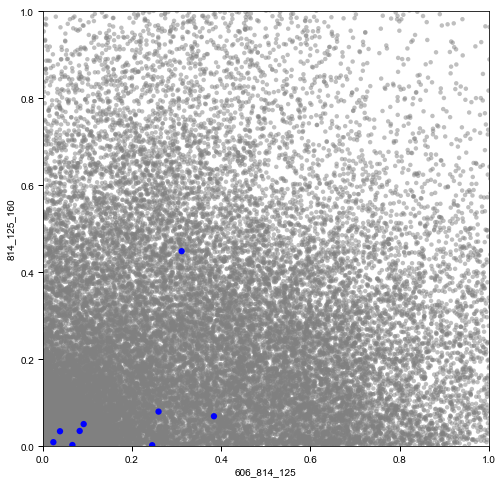

In [19]:
fig=plt.figure(figsize=(8,8))
plt.scatter(distance_606_814_125_egs,distance_814_125_160_egs,c='gray',edgecolors='none',s=20,alpha=0.5)
for i in stars_list:
    plt.scatter(distance_606_814_125_egs[int(i)],distance_814_125_160_egs[int(i)],c='blue',edgecolors='none',s=40,alpha=1)
for i in galaxy_list:
    plt.scatter(distance_606_814_125_egs[int(i)],distance_814_125_160_egs[int(i)],c='red',edgecolors='none',s=40,alpha=1)
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('606_814_125')
plt.ylabel('814_125_160')
plt.savefig(out_dir+'distance_diagram_egs_pt4_starlike.pdf')

hdulist.close() 